<a href="https://colab.research.google.com/github/Lisker2/ML/blob/main/simple_implementation/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# KMeans

In [ ]:
class KMeans:

  def __init__(self, iter = 10, k = 3):
    
    self.iter = iter
    self.k = k
    self.centroids = None
    self.score = -1
    self.loss = float('inf')

  def fit(self, X):
    X = np.array(X)
    m = X.shape[0]
    n = X.shape[1]

    # randomly initialize k data points to be the centroids
    centroids = np.array([X[random.randint(0, m - 1)] for _ in range(self.k)]) 
    # calculate the distance between each data point to the each centroid: a (m,k) matrix
    dist = np.array([[0 for _ in range(self.k)] for _ in range(m)])
    zeros = np.zeros(n)

    for i in range(self.iter):

      for j in range(self.k):
        # update a column of the dist matrix
        dist[:, j] = np.sum((X - centroids[j])**2, axis = 1)

      # use the argmin function to find the min value of each line of the dist matrix --- the nearest centroid
      argmin=np.argmin(dist, axis=1)

      for j in range(self.k):

        # find the data points that belong to the current calculated centroid
        X_i = list(map(lambda x, y: x if y == j else zeros, X, argmin))
        if len(argmin[argmin==j]) != 0:
          # update the position of centroids to be the average of the X_i
          centroids[j] = np.divide(np.sum(X_i, axis = 0), len(argmin[argmin==j]))
        else:
          # if there's no data points belong to the current centroid, then re-initialize the centroid
          centroids[j] = X[random.randint(0, m - 1)]
    
    # remember the centroids
    self.centroids = centroids
    # use silhouette_score
    self.score = silhouette_score(X, argmin)
    # loss -- calculate the mean distance of data points to their nearest centroid
    self.loss = np.sum(np.min(dist, axis=1)) / m

## Test the implementation 

In [ ]:
iris = datasets.load_iris()
features = iris.data
labels = iris.target
iris_pca = PCA(n_components = 2)
iris_pca.fit( features )
iris_2D = iris_pca.transform( features )

Silhouette Score
 0.5987948388984352
Centroids
 [[-2.64241546  0.19088505]
 [ 0.67566229 -0.31520477]
 [ 2.37446608  0.26311694]]
Loss
 0.12666666666666668


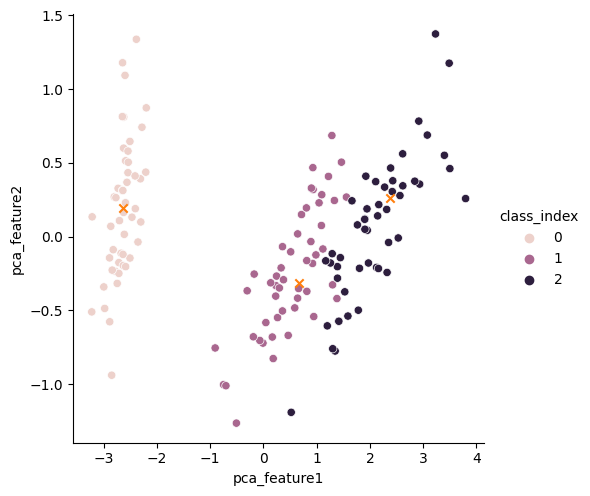

In [ ]:
clf = KMeans(k = 3)
clf.fit(iris_2D)
print("Silhouette Score\n",clf.score)
print("Centroids\n",clf.centroids)
print("Loss\n", clf.loss)

iris_pca_df = pd.DataFrame(iris_2D, columns = ['pca_feature1', 'pca_feature2'])
iris_pca_df.insert( 2, 'class_index', labels )
sns.pairplot( x_vars = ['pca_feature1'], y_vars = ['pca_feature2'], data = iris_pca_df, hue = "class_index", height= 5 )
plt.scatter(clf.centroids[:,0],clf.centroids[:,1], marker='x')

looks good

## Test three datasets

### Absenteeism_at_work.xls

In [ ]:
absenteeism = pd.read_excel("http://43.143.180.76/data/Absenteeism_at_work.xls").sample(frac=1.0).reset_index(drop=True)
absenteeism.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,20,28,4,6,3,260,50,11,36,239409,...,0,1,4,1,0,0,65,168,23,3
1,28,0,10,2,4,225,26,9,28,284853,...,1,1,1,0,0,2,69,169,24,0
2,28,23,9,4,1,225,26,9,28,261756,...,0,1,1,0,0,2,69,169,24,1
3,28,23,6,4,1,225,26,9,28,253957,...,0,1,1,0,0,2,69,169,24,2
4,20,28,9,6,1,260,50,11,36,294217,...,0,1,4,1,0,0,65,168,23,4


In [ ]:
# Here I predict the Education as a classification task.
# Drop ID column
# 1 - highschol, 2 - graduate, 3 - postgraduate, 3 - master and doctor
absenteeism = absenteeism.drop('ID', axis = 1)

absenteeism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Reason for absence               740 non-null    int64
 1   Month of absence                 740 non-null    int64
 2   Day of the week                  740 non-null    int64
 3   Seasons                          740 non-null    int64
 4   Transportation expense           740 non-null    int64
 5   Distance from Residence to Work  740 non-null    int64
 6   Service time                     740 non-null    int64
 7   Age                              740 non-null    int64
 8   Work load Average/day            740 non-null    int64
 9   Hit target                       740 non-null    int64
 10  Disciplinary failure             740 non-null    int64
 11  Education                        740 non-null    int64
 12  Son                              740 non-null    i

In [ ]:
columns_absenteeism = list(absenteeism.columns)
columns_absenteeism.remove('Education')
X_absent = absenteeism[columns_absenteeism]
Y_absent = absenteeism['Education']

kmeans_absent = KMeans(k = 4)
kmeans_absent.fit(X_absent)
print("Silhouette Score\n",kmeans_absent.score)

Silhouette Score
 0.5514657748898464


### accelerometer.csv

In [ ]:
accelerometer = pd.read_csv("http://43.143.180.76/data/accelerometer.csv").sample(frac=1.0).reset_index(drop=True)
accelerometer.head()

,wconfid,pctid,x,y,z
0,3,90,0.953,0.098,-0.086
1,1,100,0.082,0.695,-0.930
2,3,60,1.016,-0.070,-0.141
3,3,50,0.926,-0.035,-0.078
4,2,40,1.004,-0.074,-0.012


In [ ]:
# wconfid: (1 - 'red' - normal configuration; 2 - 'blue' - perpendicular configuration; 3 - 'green' - opposite configuration)

accelerometer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153000 entries, 0 to 152999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   wconfid  153000 non-null  int64  
 1   pctid    153000 non-null  int64  
 2   x        153000 non-null  float64
 3   y        153000 non-null  float64
 4   z        153000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 5.8 MB


In [ ]:
columns_accelerometer = list(accelerometer.columns)
columns_accelerometer.remove('wconfid')
X_accelerometer = accelerometer[columns_accelerometer]
Y_accelerometer = accelerometer['wconfid']

kmeans_accelerometer = KMeans(k = 3)
kmeans_accelerometer.fit(X_accelerometer)
print("Silhouette Score\n", kmeans_accelerometer.score)

Silhouette Score
 0.5805848142811886


### heart_failure_clinical_records_dataset.csv

In [ ]:
heart = pd.read_csv("http://43.143.180.76/data/heart_failure_clinical_records_dataset.csv").sample(frac=1.0).reset_index(drop=True)
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,85.0,1,102,0,60,0,507000.0,3.2,138,0,0,94,0
1,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
3,58.0,0,582,1,25,0,504000.0,1.0,138,1,0,205,0
4,72.0,1,943,0,25,1,338000.0,1.7,139,1,1,111,1


In [ ]:
# DEATH_EVENT 0/1

heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
columns_heart = list(heart.columns)
columns_heart.remove('DEATH_EVENT')
X_heart = heart[columns_heart]
Y_heart = heart['DEATH_EVENT']

kmeans_heart = KMeans(k = 2)
kmeans_heart.fit(X_heart)
print("Silhouette Score\n", kmeans_heart.score)

Silhouette Score
 0.5828885061247476


# Forward Selection and Backward Elimination

In [ ]:
def forward_selection(X, columns, k):
  features = []
  temp_score = -1
  n = len(columns)

  for i in range(n):

    features.append(columns[i])
    kmeans = KMeans(k = k)
    kmeans.fit(X[features])

    if temp_score != -1:
      if temp_score > kmeans.score:
        features.pop()
      else:
        temp_score = kmeans.score
    else:
      temp_score = kmeans.score

  print("Features after selection\n", features)
  print("Score\n", temp_score)

In [ ]:
forward_selection(X_absent, columns_absenteeism, 4)

Features after selection
 ['Reason for absence', 'Disciplinary failure']
Score
 0.7024407338770805


In [ ]:
forward_selection(X_accelerometer, columns_accelerometer, 3)

Features after selection
 ['pctid']
Score
 0.6039563468697797


In [ ]:
forward_selection(X_heart, columns_heart, 2)

Features after selection
 ['age', 'creatinine_phosphokinase']
Score
 0.8295045443312039


In [ ]:
def backward_elimination(X, columns, k):
  features = columns[:]
  temp_score = -1
  n = len(columns)

  for i in range(n):

    if temp_score != -1:
      features.remove(columns[i - 1])
    
    kmeans = KMeans(k = k)
    kmeans.fit(X[features])
    
    if temp_score != -1:
      if temp_score > kmeans.score + 0.05:
        features.append(columns[i - 1])
      else:
        temp_score = kmeans.score
    else:
      temp_score = kmeans.score
  print("Features after selection\n", features)
  print("Score\n", temp_score)

In [ ]:
backward_elimination(X_absent, columns_absenteeism, 4)

Features after selection
 ['Absenteeism time in hours', 'Work load Average/day ', 'Height']
Score
 0.598114474799374


In [ ]:
backward_elimination(X_heart, columns_heart, 2)

Features after selection
 ['time']
Score
 0.6744100313093936


# PCA

In [ ]:
def PCA_2D_visualization(X, Y, k):

  X = np.array(X)
  Y = np.array(Y)

  pca = PCA(n_components = 2)
  pca.fit(X)
  X_2D = pca.transform(X)

  pca_df = pd.DataFrame(X_2D, columns = ['pca_feature1', 'pca_feature2'])
  pca_df.insert(2, 'class_index', Y)
  
  sns.pairplot( x_vars = ['pca_feature1'], y_vars = ['pca_feature2'], data = pca_df, hue = "class_index", height= 3 )

  kmeans = KMeans(k = k)
  kmeans.fit(X_2D)
  print(kmeans.score)
  plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], marker='x')

0.5026849893036986


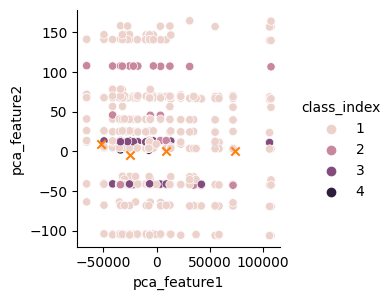

In [ ]:
PCA_2D_visualization(X_absent, Y_absent, 4)

0.585553009248293


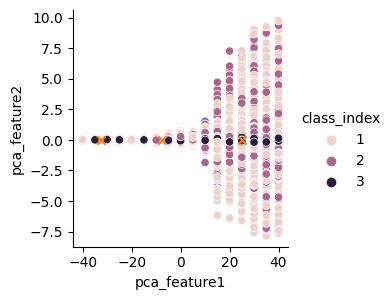

In [ ]:
PCA_2D_visualization(X_accelerometer, Y_accelerometer, 3)

0.5580011936249883


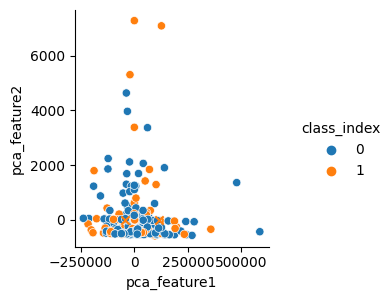

In [ ]:
PCA_2D_visualization(X_heart, Y_heart, 2)

In [ ]:
def PCA_3D_visualization(X, Y, k):

  X = np.array(X)
  Y = np.array(Y)

  pca = PCA(n_components = 3)
  pca.fit(X)
  X_3D = pca.transform(X)

  pca_df = pd.DataFrame(X_3D, columns = ['pca_feature1', 'pca_feature2','pca_feature3'])
  pca_df.insert(3, 'class_index', Y)
  
  ax = plt.figure(figsize=(10, 5)).add_subplot(projection='3d')
  ax.scatter(xs=pca_df['pca_feature1'], ys=pca_df['pca_feature2'],zs=pca_df['pca_feature3'], c = Y)

  ax.set_xlabel('pca_feature1')
  ax.set_ylabel('pca_feature2')
  ax.set_zlabel('pca_feature3')

  kmeans = KMeans(k = k)
  kmeans.fit(X_3D)
  print(kmeans.score)
  ax.scatter(xs=kmeans.centroids[:,0], ys=kmeans.centroids[:,1],zs=kmeans.centroids[:,2], c = 'r', marker='x')


0.5588615139328552


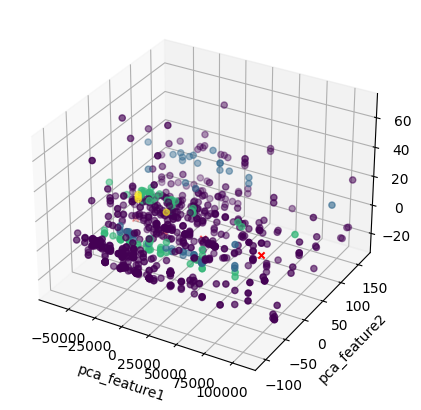

In [ ]:
PCA_3D_visualization(X_absent, Y_absent, 4)

0.5828703546073472


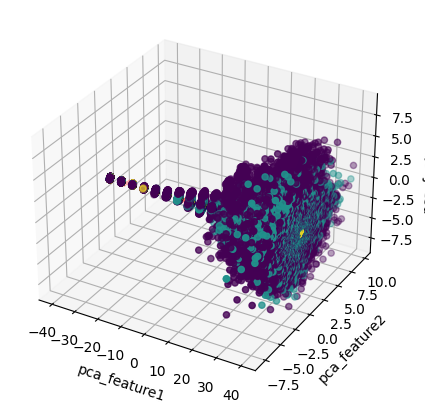

In [ ]:
PCA_3D_visualization(X_accelerometer, Y_accelerometer, 3)

0.5451387383991748


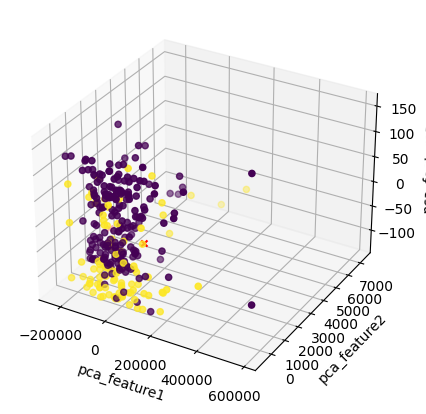

In [ ]:
PCA_3D_visualization(X_heart, Y_heart, 2)

# Find K

In [ ]:
def findK_elbow(k_max, X, pca):
  x = [i + 2 for i in range(k_max - 2)] 
  y = []
  for i in range(2, k_max):
    kmeans = KMeans(k = i)
    kmeans.fit(PCA(n_components = pca).fit_transform(StandardScaler().fit_transform(X)))
    y.append(kmeans.loss)
  plt.plot(x, y)

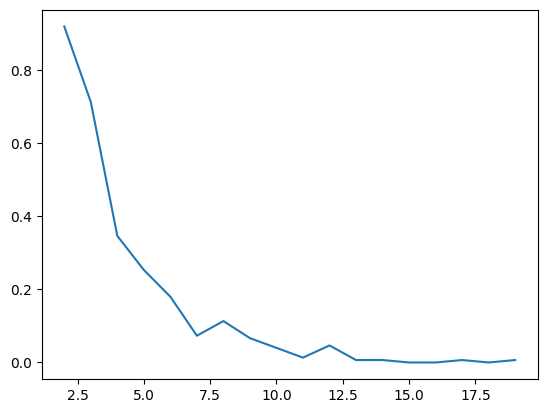

In [ ]:
findK_elbow(20, features, 2)

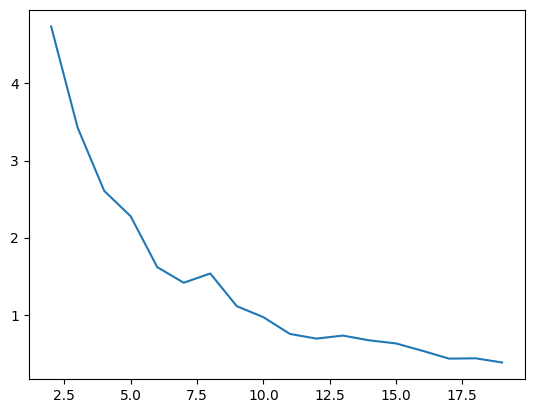

In [ ]:
findK_elbow(20, X_absent, 3)

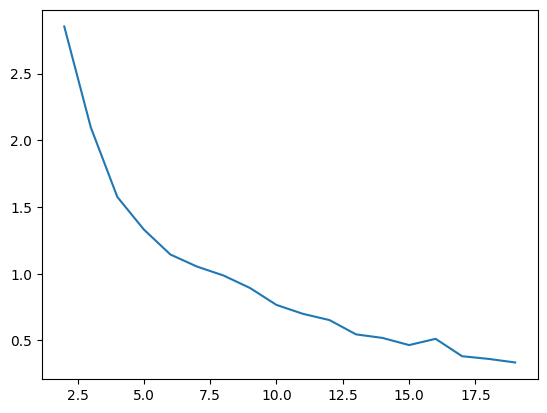

In [ ]:
findK_elbow(20, X_heart, 3)

In [ ]:
def findK_score(k_max, X):
  best_k = 2
  best_score = -1
  for i in range(2, k_max):
    kmeans = KMeans(k = i)
    kmeans.fit(X)
    if kmeans.score > best_score:
      best_score = kmeans.score
      best_k = i
  print('best_k', best_k)
  print('best_score', best_score)

In [ ]:
findK_score(20, features)

best_k 2
best_score 0.6810461692117462


In [ ]:
findK_score(20, X_absent)

best_k 18
best_score 0.7519014782257266


In [ ]:
findK_score(20, X_heart)

best_k 14
best_score 0.5673523806588231
